# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I've selected the TMDb movie data which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The data is cleaned from the kaggle original data (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) 

The dataset have 10866 rows and 21 columns. The columns are in these following: 
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj




### Questions for Analysis

1.Research Question 1: What is the percentage of each rating level?

2.Research Question 2:  What are the characteristics of high rating movies?

3.Research Question 3: Which year release the most amount of high rating movies?

4.Research Question 4:  Is the budget associated with the rating level?

5.Research Question 5:  Is the runtime associated with the rating level?

6.Research Question 6: What is the most occurrence word in the tagline of the high rating movie?


<a id='wrangling'></a>
## Data Wrangling
This part I've imported(gathered data), assessed and cleaned data for the analysis part.

In [172]:
#import packages for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
# import data and print out a first 5 lines.
df = pd.read_csv('tmdb-movies.csv')
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

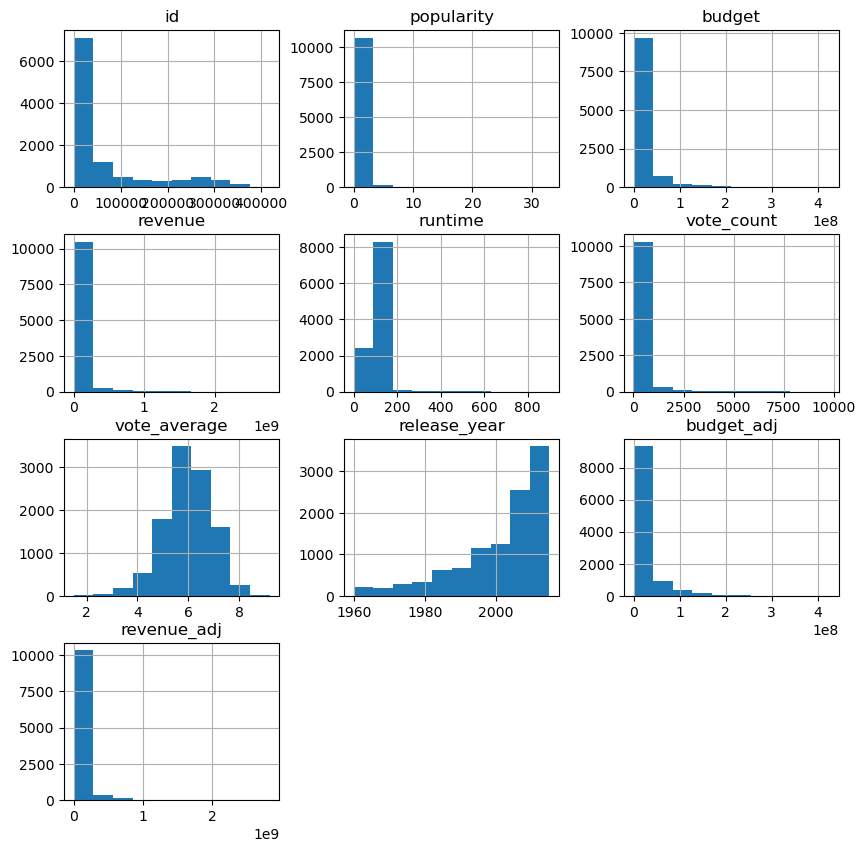

In [175]:
#get a breif statistic data
print(df.describe())
df.hist(figsize=(10,10))

In [176]:
# drop the unecessary coloumn for the analysis
df.drop(['id','imdb_id','budget','overview','revenue','popularity','cast','genres','homepage','director','production_companies', 'keywords','release_date']
        , axis = 1 , inplace = True)
df.head()

,original_title,tagline,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,What a Lovely Day.,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,One Choice Can Destroy You,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Every generation has a story.,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vengeance Hits Home,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [177]:
#checking missing data and data type of each column
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   tagline         8042 non-null   object 
 2   runtime         10866 non-null  int64  
 3   vote_count      10866 non-null  int64  
 4   vote_average    10866 non-null  float64
 5   release_year    10866 non-null  int64  
 6   budget_adj      10866 non-null  float64
 7   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 679.2+ KB
None
original_title       0
tagline           2824
runtime              0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64


In [178]:
#check duplicate
df.duplicated().sum()

1


### Data Cleaning

From the data assessing above, only a tagline column have missing values, and it's more than 20% of the total data. 
I will copy another DataFrame to work specifically with the question that relevant with tagline to preserve data in other columns for other questions.

Additionally,From the charts and output of info() and describe(), even the runtime, budget_adj and revenue_adj don't contain any missing value, but it seems like they have column that contain 0 value which doesn't make sense, and they are needed to be fixed

Also the dataset has 1 duplication, and I will handle it first.

In summary what I did in cleaning process is :
1. Drop the duplicate
2. Prepare the DataFrame for tagline question
3. Drop the 0 value of runtime, budget_adj and revenue_adj


In [179]:
#drop duplicate
df.drop_duplicates(inplace = True)

#recheck the duplicate avalue again (the output should be 0)
df.duplicated().sum()

0

In [180]:
# prepare the DataFrame for tagline question

#copy the Dataframe
df_tag = df.copy(deep = True)
#drop nan value
df_tag.dropna(inplace = True)
df_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8041 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  8041 non-null   object 
 1   tagline         8041 non-null   object 
 2   runtime         8041 non-null   int64  
 3   vote_count      8041 non-null   int64  
 4   vote_average    8041 non-null   float64
 5   release_year    8041 non-null   int64  
 6   budget_adj      8041 non-null   float64
 7   revenue_adj     8041 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 565.4+ KB


            runtime    vote_count  vote_average  release_year    budget_adj  \
count  10865.000000  10865.000000  10865.000000  10865.000000  1.086500e+04   
mean     102.071790    217.399632      5.975012   2001.321859  1.754989e+07   
std       31.382701    575.644627      0.935138     12.813260  3.430753e+07   
min        0.000000     10.000000      1.500000   1960.000000  0.000000e+00   
25%       90.000000     17.000000      5.400000   1995.000000  0.000000e+00   
50%       99.000000     38.000000      6.000000   2006.000000  0.000000e+00   
75%      111.000000    146.000000      6.600000   2011.000000  2.085325e+07   
max      900.000000   9767.000000      9.200000   2015.000000  4.250000e+08   

        revenue_adj  
count  1.086500e+04  
mean   5.136900e+07  
std    1.446383e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    3.370173e+07  
max    2.827124e+09  


array([[<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

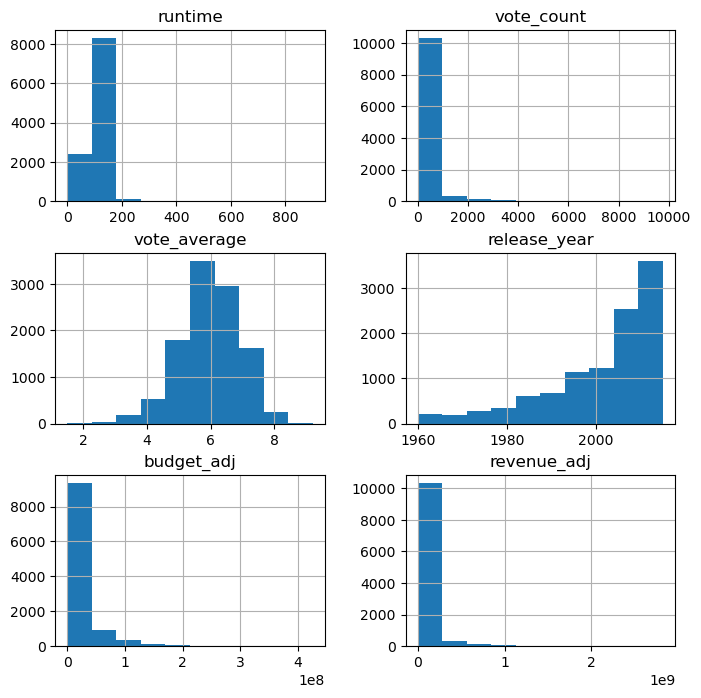

In [181]:
#geting a brief statistic data of this data set
print(df.describe())
df.hist(figsize=(8,8))

In [182]:
#Drop the 0 value of runtime, budget_adj and revenue_ajd

# First,count the 0 value in each columns
print('0 value in runtime: ' + str(df.query('runtime == 0').shape[0]))
print('0 value in runtime: ' + str(df.query('budget_adj == 0').shape[0]))
print('0 value in runtime: ' + str(df.query('revenue_adj == 0').shape[0]))

0 value in runtime: 31
0 value in runtime: 5696
0 value in runtime: 6016


In [183]:
#create function to replace 0 value with nan and then drop the nan value

def replaceNan_and_drop(column, value):
    df[i].replace(value,np.nan, inplace = True)

replace_columns = ['runtime', 'budget_adj', 'revenue_adj' ]

for i in replace_columns:
    replaceNan_and_drop(i,0)

df.dropna(inplace = True)

In [184]:
#Check 0 value again

print('0 value in runtime: ' + str(df.query('runtime == 0').shape[0]))
print('0 value in runtime: ' + str(df.query('budget_adj == 0').shape[0]))
print('0 value in runtime: ' + str(df.query('revenue_adj == 0').shape[0]))

df.info()

0 value in runtime: 0
0 value in runtime: 0
0 value in runtime: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  3574 non-null   object 
 1   tagline         3574 non-null   object 
 2   runtime         3574 non-null   float64
 3   vote_count      3574 non-null   int64  
 4   vote_average    3574 non-null   float64
 5   release_year    3574 non-null   int64  
 6   budget_adj      3574 non-null   float64
 7   revenue_adj     3574 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 251.3+ KB


In [185]:
df_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8041 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  8041 non-null   object 
 1   tagline         8041 non-null   object 
 2   runtime         8041 non-null   int64  
 3   vote_count      8041 non-null   int64  
 4   vote_average    8041 non-null   float64
 5   release_year    8041 non-null   int64  
 6   budget_adj      8041 non-null   float64
 7   revenue_adj     8041 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 565.4+ KB


Everything is good to go for the analysis :-)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the percentage of each rating level?

In [186]:
#This question finds the rating levels of this dataset based on the voting_average

#create rating_levels column from the different percentile of voting average from describe()
print(df.vote_average.describe())
bin_edges=[2.2,5.7,6.2,6.7,8.4]
bin_names=['Low','Moderately Low','Medium','High']
df['rating_levels'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

count    3574.000000
mean        6.170341
std         0.794928
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64


<AxesSubplot:title={'center':'Proportion of Movie rating levels(%)'}, ylabel=' '>

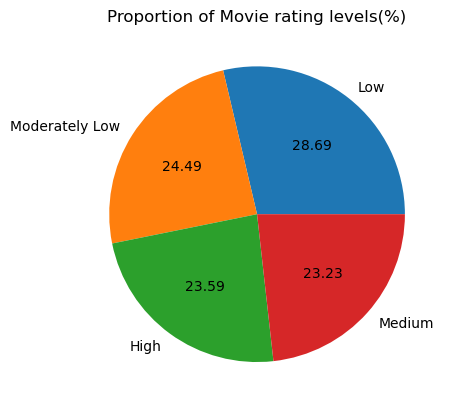

In [187]:
#plot a pie chart
df['rating_levels'].value_counts().plot(kind = 'pie', autopct='%.2f', label = ' ', title ="Proportion of Movie rating levels(%)")

Low               1025
Moderately Low     875
High               843
Medium             830
Name: rating_levels, dtype: int64

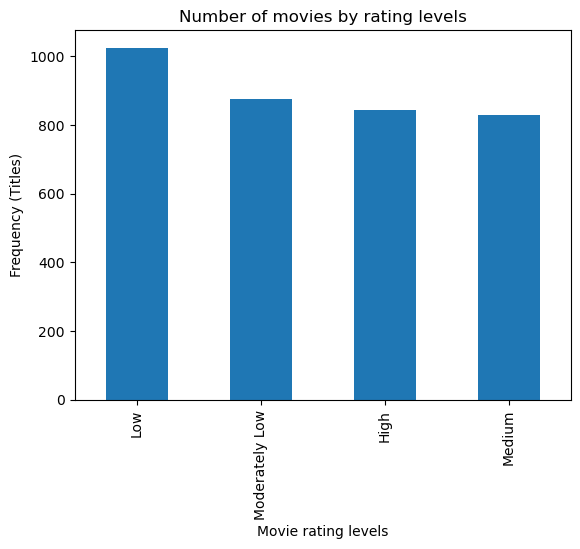

In [188]:
#plot the bar chart chart and count value
df['rating_levels'].value_counts().plot(kind = 'bar', title = "Number of movies by rating levels", xlabel = 'Movie rating levels', ylabel = 'Frequency (Titles)')
df['rating_levels'].value_counts()

From the both charts above, there are 1,025 titles that got the low rating which accounted for 28.69 % and make this group as the majority of this data set. While the high rating group,which this analysis will focus, have 843 title accounted for 23.59%.


### Research Question 2:  What are the characteristics of high rating movies?

          runtime   vote_count  vote_average  release_year    budget_adj  \
count  843.000000   843.000000    843.000000    843.000000  8.430000e+02   
mean   119.040332  1127.069988      7.184698   1998.411625  4.661736e+07   
std     23.838945  1399.315630      0.325030     13.887748  4.969499e+07   
min     26.000000    10.000000      6.800000   1960.000000  3.000000e+00   
25%    102.000000   201.000000      6.900000   1990.000000  1.299001e+07   
50%    116.000000   592.000000      7.100000   2002.000000  2.920507e+07   
75%    132.000000  1553.500000      7.400000   2010.000000  6.173822e+07   
max    216.000000  9767.000000      8.400000   2015.000000  3.155006e+08   

        revenue_adj  
count  8.430000e+02  
mean   2.345114e+08  
std    3.332609e+08  
min    2.861934e+00  
25%    3.676464e+07  
50%    1.090936e+08  
75%    2.933417e+08  
max    2.827124e+09  


array([[<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

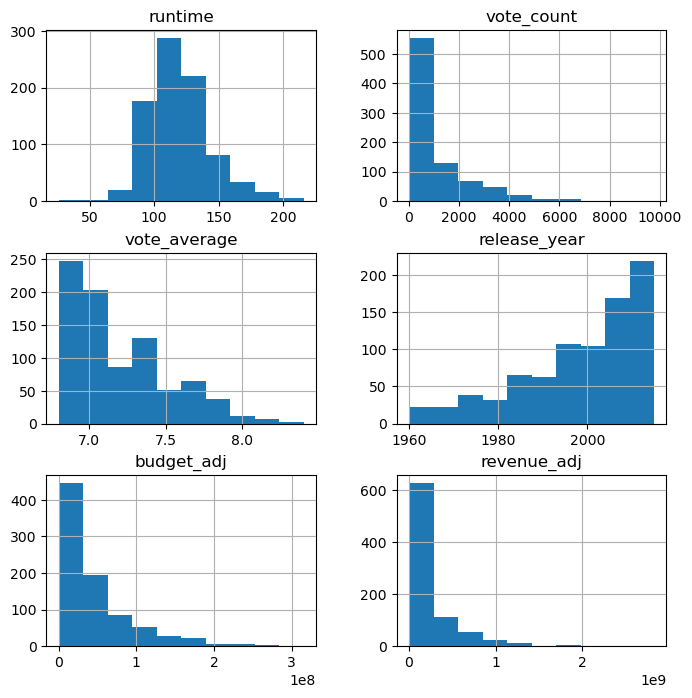

In [189]:
#Query the high rating movies
high_rate_movie = df.query('rating_levels == "High"')
print (high_rate_movie.describe())

#plot the histrogram
high_rate_movie.hist(figsize = (8,8))

From the information above, it shows that the high rate voting movie use a budjet(adj)in avearage around \$ 46,617,355 and got the average revenue (adj) 

around \$ 234,511,369. The average runtime of the high rate voting movie is around 119 minuets and got voting average at 7.18. 

The chart also indicates the trend of the number of high rate movie release. I will investigate more about this in the next question. 

### Research Question 3: Which year release the most amount of high rating movies?

release_year
2015    49
2014    46
2013    40
2007    36
2011    32
dtype: int64


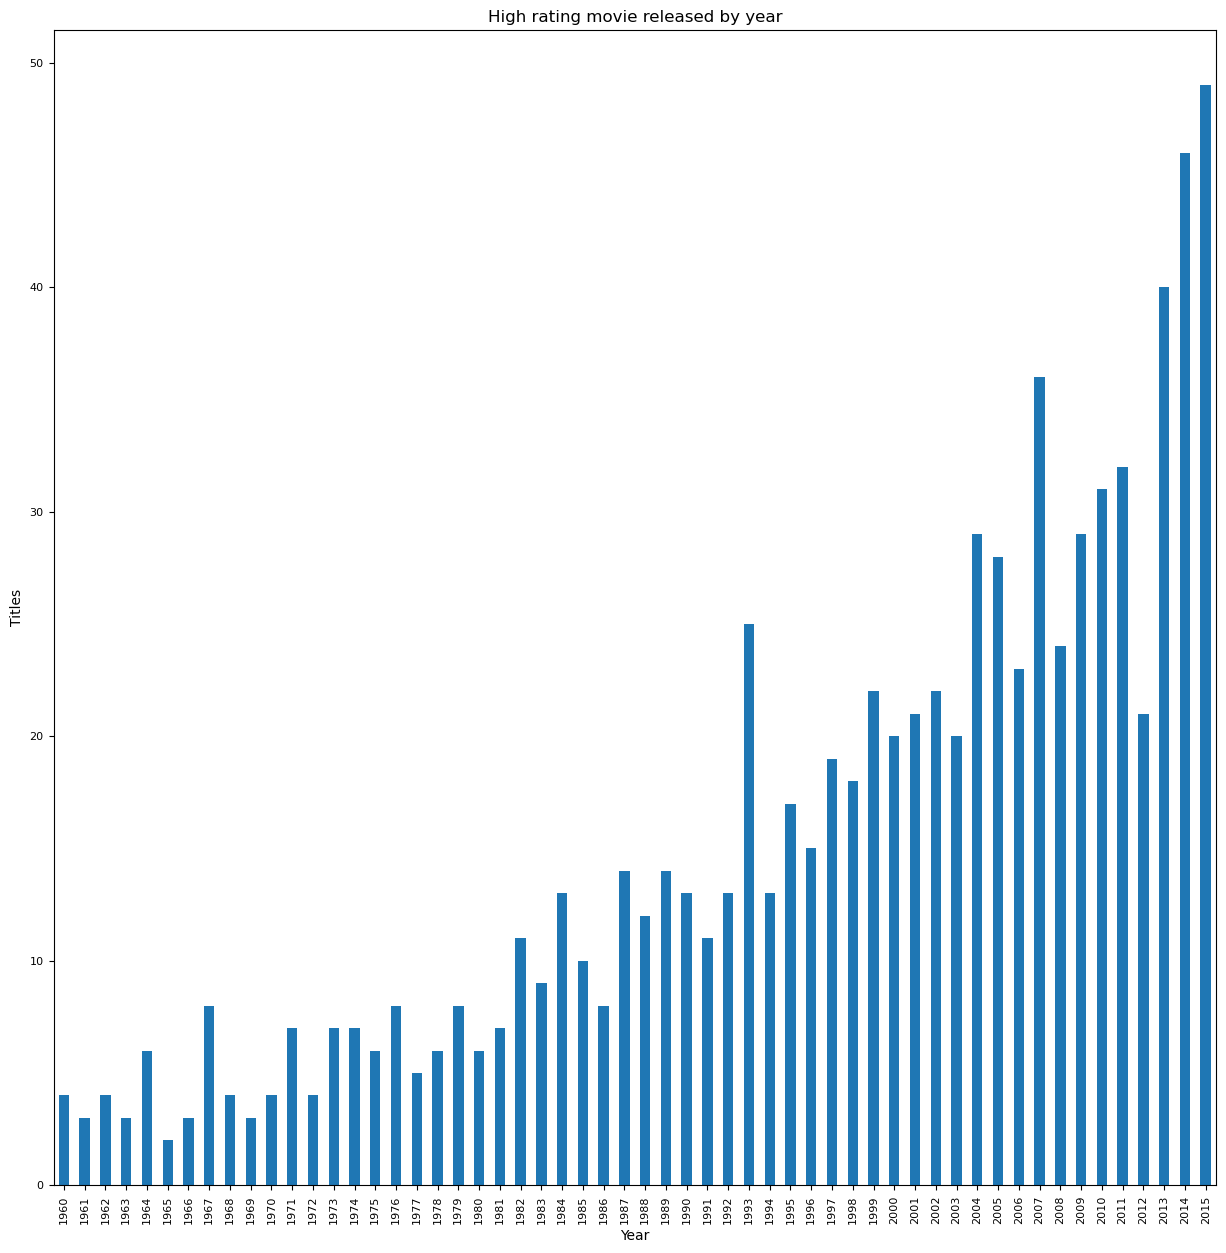

In [190]:
#Query the high rating movies and count the release year
year = df.query('rating_levels == "High"').value_counts('release_year')

#Sort the day by index and then plot a bar chart
year.sort_index().plot(kind = 'bar', figsize =(15,15), title = 'High rating movie released by year', fontsize=8, xlabel = 'Year', ylabel ='Titles')

#print the top five years
print(year.sort_values(ascending= False).head())

From the information above, it's very interesting to see that the high rating movie is on the rising trend, especially after the year 1992,. The year that released the most amount of high rating movie is 2015 with the number of 49 titles. While 2014,2013,2007 and 2011 are also listed in the top five year respectively.

### Research Question 4:  Is the budget associated with the rating level?

rating_levels
Low               4.302728e+07
Moderately Low    4.800129e+07
Medium            4.663497e+07
High              4.661736e+07
Name: budget_adj, dtype: float64


<AxesSubplot:title={'center':'Average budget ($) by rating levels'}, xlabel='Rating Levels', ylabel='Budget ($)'>

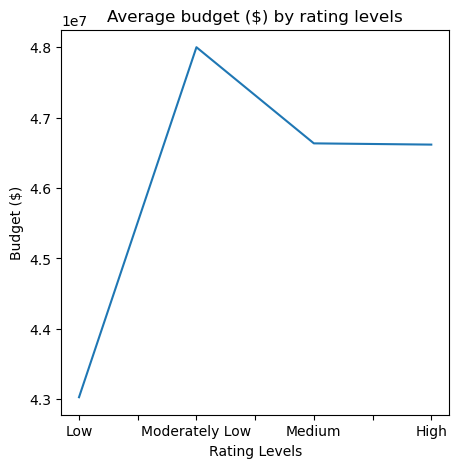

In [191]:
#Group the rating_level and see the average budget of each rating group, then print
budget_mean = df.groupby('rating_levels')['budget_adj'].mean()
print(budget_mean)

#plot a line chart
budget_mean.plot(kind = 'line', figsize = (5,5), title = 'Average budget ($) by rating levels', xlabel = 'Rating Levels', ylabel = 'Budget ($)')

From the chart above, the medium rating movie invest budget the most in average. While the high rating movie is invest budget lower than moderately low and medium rating move.It's very interesting to note that high budget doesn't guarantee the high rating outcome.

### Research Question 5:  Is the runtime associated with the rating level?

rating_levels
Low               100.938537
Moderately Low    106.899429
Medium            111.477108
High              119.040332
Name: runtime, dtype: float64


<AxesSubplot:title={'center':'Average runtime (mins) by rating levels'}, xlabel='Rating Levels', ylabel='Runtime (mins)'>

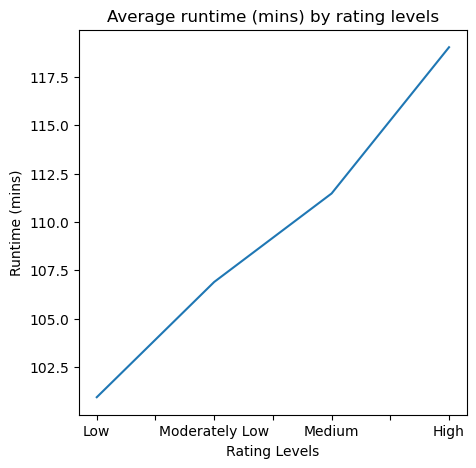

In [192]:
#Group the rating_level and see the average runetime of each rating group, then print

runtime_mean = df.groupby('rating_levels')['runtime'].mean()
print(runtime_mean)

#ploat a line chart
runtime_mean.plot(kind = 'line', figsize = (5,5), title = 'Average runtime (mins) by rating levels',xlabel = 'Rating Levels', ylabel = 'Runtime (mins)')

From the line chart above, the higher rating movies seem to have longer runtime duration.

### Research Question 6: What is the most occurrence word in the tagline of the high rating movie?

In [193]:
# This question find the popular word in high vote moive tagling which exclude article, preposition, conjunction and pronoun word)

# selecting the high rate movie which the vote average is start from 75% percentile (which is 6.7)

high_rate_movie_tag = df_tag.query('vote_average >= 6.7')

high_rate_movie_tag.head()

,original_title,tagline,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,Mad Max: Fury Road,What a Lovely Day.,120,6185,7.1,2015,1.379999e+08,3.481613e+08
3,Star Wars: The Force Awakens,Every generation has a story.,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vengeance Hits Home,137,2947,7.3,2015,1.747999e+08,1.385749e+09
5,The Revenant,"(n. One who has returned, as if from the dead.)",156,3929,7.2,2015,1.241999e+08,4.903142e+08
7,The Martian,Bring Him Home,141,4572,7.6,2015,9.935996e+07,5.477497e+08


In [194]:
#See how many occurency of each words in tagline
word = high_rate_movie_tag.tagline.str.split(expand=True).stack().value_counts()
print(word.head())

the    706
a      431
of     371
The    324
to     313
dtype: int64


The 1 most popular word in high rating movie tagline is'one', with the occurrence of 73 times
The 2 most popular word in high rating movie tagline is'story', with the occurrence of 73 times
The 3 most popular word in high rating movie tagline is'One', with the occurrence of 65 times
The 4 most popular word in high rating movie tagline is'will', with the occurrence of 64 times
The 5 most popular word in high rating movie tagline is'are', with the occurrence of 62 times
The 6 most popular word in high rating movie tagline is'about', with the occurrence of 56 times
The 7 most popular word in high rating movie tagline is'has', with the occurrence of 56 times
The 8 most popular word in high rating movie tagline is'never', with the occurrence of 53 times
The 9 most popular word in high rating movie tagline is'love', with the occurrence of 52 times
The 10 most popular word in high rating movie tagline is'no', with the occurrence of 51 times


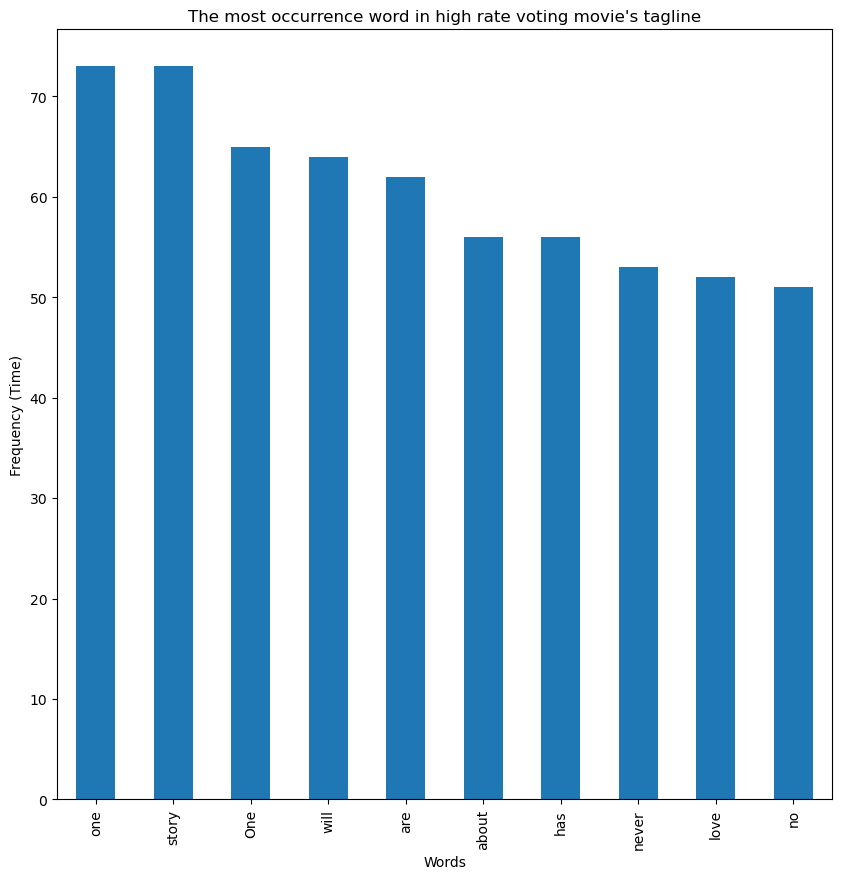

In [195]:
#To find the popular word that isn't the article, preposition, conjunction and pronoun word, 
#creat list of exclude word and check each word in for loop.

#Frist, define the list of the exlcude words,article, preposition, conjunction and pronoun word) 

exclude_list =['the','The', 'a','A','an','An','and','And',
         'he','He','she','She','it','It','You','you','we','We','they','They',
         'his','His','her','Her','him','Him','your','Your',
         'at', 'At','on', 'On','for','For','in', 'In',
         'be','Be','is','Is','am','Am','are,''Are','was','Was','were','Were', 
         'of','Of','to','To','this','This','that','That','those','Those','these','These',]


# Next, create fucntion for checking if the word is in the exclude list and generate top word
def gettopword (series,exclude_list,top_num): #top_num is the amouth of top word to explore
    start_num = 0
    for i,v in series.items():
    #if the word is in the exclude list, go back to the start
        if i in exclude_list:
            series.drop(labels = [i], inplace = True)
            pass
    #if the word is not in the list, print the word and it occurrency
        else:
            print('The ' + str(start_num + 1) + ' most popular word in high rating movie tagline is' + "'"+ str(i) +"'" 
            + ', with the occurrence of ' + str(v) + ' times')
            start_num += 1
            # when reach the number of words defined by top_num, break the loop
            if start_num == top_num: 
                break           
    series[0:top_num].plot(kind = 'bar', figsize = (10,10), xlabel = "Words", ylabel = 'Frequency (Time)', title ='The most occurrence word in high rate voting movie\'s tagline')

#Then call the function
gettopword(word,exclude_list,10)

From the chart above, the word 'one' and 'story' have the highest occurance in the tagline of high rating movie at 73 times which appear more than the 10th word in the top ten list which is 'no' (51 times)around 43%.

<a id='conclusions'></a>
## Conclusions

As seen from the analysis above, most of the movies in the data set has a low rating. However, the high rating movie uses less budget in average than moderately low and medium rating movie but have the longest runtime on average among the group. 

For the characteristic of high rating movie, it invested a budget (adj) in average of around \$ 46,617,355 and got an average revenue (adj) of around 

$ 234,511,369. On average, the high rating movie has 119 minutes of runtime and got voting at 7.18.

It's also very interesting that the word 'one' and 'story' have the highest occurrence in the tagline of high rating movie at 73 times.

The application of this analysis can be used to plan for movie production such as budget spending or runtime duration, to get the high rating movie. Additionally, the last research question about the tagline can help the marketing (copywriting team) to design communication messages (word) for the movie promotion.

**Limitation**: This analysis has some limitations which are:

1. The dataset doesn't define the unit of measurement of runtime (the minute is the researcher's own implication)
2. The range vount_count is pretty wide as the minimum is 10 and the maximum is 9767. Thus the reliability of the vote should be taken into consideration
3. Even though the data just show the maximum of vote_average is 8.4, the data doesn't confirm the maximum and minimum in scale value that the voter can vote. Thus we can't officially say the maximum vote_average is 8.4 out of 10.